In [6]:
from bs4 import BeautifulSoup
import urllib3
import re

In [7]:
import requests
import lxml.html as lh
import pandas as pd

In [8]:
url='https://cloudbigd.com/placement/?hr_id=833'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [9]:
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [10]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"JOB ID"
2:"Posted Date"
3:"Specialized Area"
4:"Job Title"
5:"Location"
6:"Bench Recruiter"
7:"Options"


In [11]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 7, the //tr data is not from our table 
    if len(T)!=7:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [12]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [13]:
df.head(1001).drop(columns=['Options'])

,JOB ID,Posted Date,Specialized Area,Job Title,Location,Bench Recruiter
0,J12918,04/15/2019,Oracle DBA,Oracle DBA\n,"New York, NY",Robert Williams
1,J12917,04/15/2019,Mobile Application,Xamarin Developer\n,"Dallax, TX",Denise Murphy
2,J12916,04/15/2019,IOS,Unknown person\t \tMobile ...\n ...,"Cedar Rapids, IA",Denise Murphy
3,J12915,04/15/2019,Full Stack Java & UI,Java developer\n,"Bloomington, IL",Anita Bradley
4,J12914,04/15/2019,Mobile Application,Sr Mobile Developer\n,"Atlanta, GA",Denise Murphy
5,J12913,04/15/2019,Andriod,Android Developer with Xa...\n,"Chicago, IL",Denise Murphy
6,J12912,04/15/2019,Java,Java Developer\n,"Atlanta, GA",Elizbeth Smith
7,J12911,04/15/2019,Tibco,Sr TIBCO Developer\n,"Cincinnati, OH",Robert Williams
8,J12910,04/15/2019,IBM Websphere,IBM Websphere\n \n ...,"Cleveland, OH",Emma Powell
9,J12909,04/15/2019,Hadoop & Big Data,Hadoop Developer\n,"Sanjose, CA",Denise Murphy


In [14]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [16]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1

In [17]:

stopwords = set(STOPWORDS)

In [18]:
data = df
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=800,
                          max_font_size=40, 
                          random_state=42).generate(str(data['Specialized Area']))

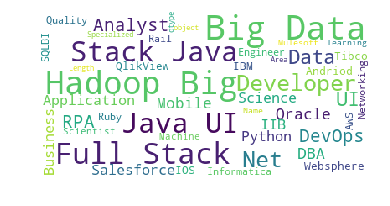

In [19]:
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)